# 1 Reconnaissance des chiffres manuscrits 
## Nous avons un apprentissage supervisée ici car les données d'entrée et la cible sont fournies.

## Le jeu de données de chiffres se compose de 8x8 images pixel de chiffres. L’attribut du jeu de données stocke ces Tableaux 8x8 de valeurs de niveaux de gris pour chaque image. Nous utiliserons ces tableaux pour Visualisez les 4 premières images. L’attribut du jeu de données stocke le chiffre que chaque image représente et qui est inclus dans le titre des 4 parcelles ci-dessous.

## ici on a un problème de classification.Pour appliquer un classificateur sur ces données, nous devons aplatir les images, en tournant chaque tableau 2D de valeurs de niveaux de gris d’une forme à l’autre. Par la suite, l’ensemble du jeu de données sera de forme , où est le nombre d’images et est le nombre total de pixels dans chaque image.

## Nous pouvons ensuite diviser les données en sous-ensembles de train et de test et adapter un support classificateur vectoriel sur les échantillons de train. Le classificateur installé peut être ensuite utilisé pour prédire la valeur du chiffre pour les échantillons dans le sous-ensemble de test.

# Importation des librairies 

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

# 2 Exploration des données

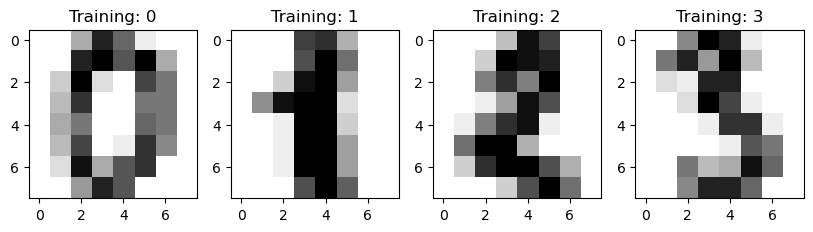

In [32]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for image,ax , label in zip(digits.images,axes, digits.target):
    ax.set_axis_on()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training: %i" % label)


In [25]:
digits.images.shape

(1797, 8, 8)

In [33]:
digits


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
# importation du dataset et insertion de la colonne target
df=pd.DataFrame(digits.data,columns=digits.feature_names)
df["target"]=digits.target
df


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [4]:
# vérification du nbre de lignes et colonnes du data
df.shape

(1797, 65)

In [5]:
# trouver les informations concernant le data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

Text(0.5, 1.0, 'Correlation sur les données')

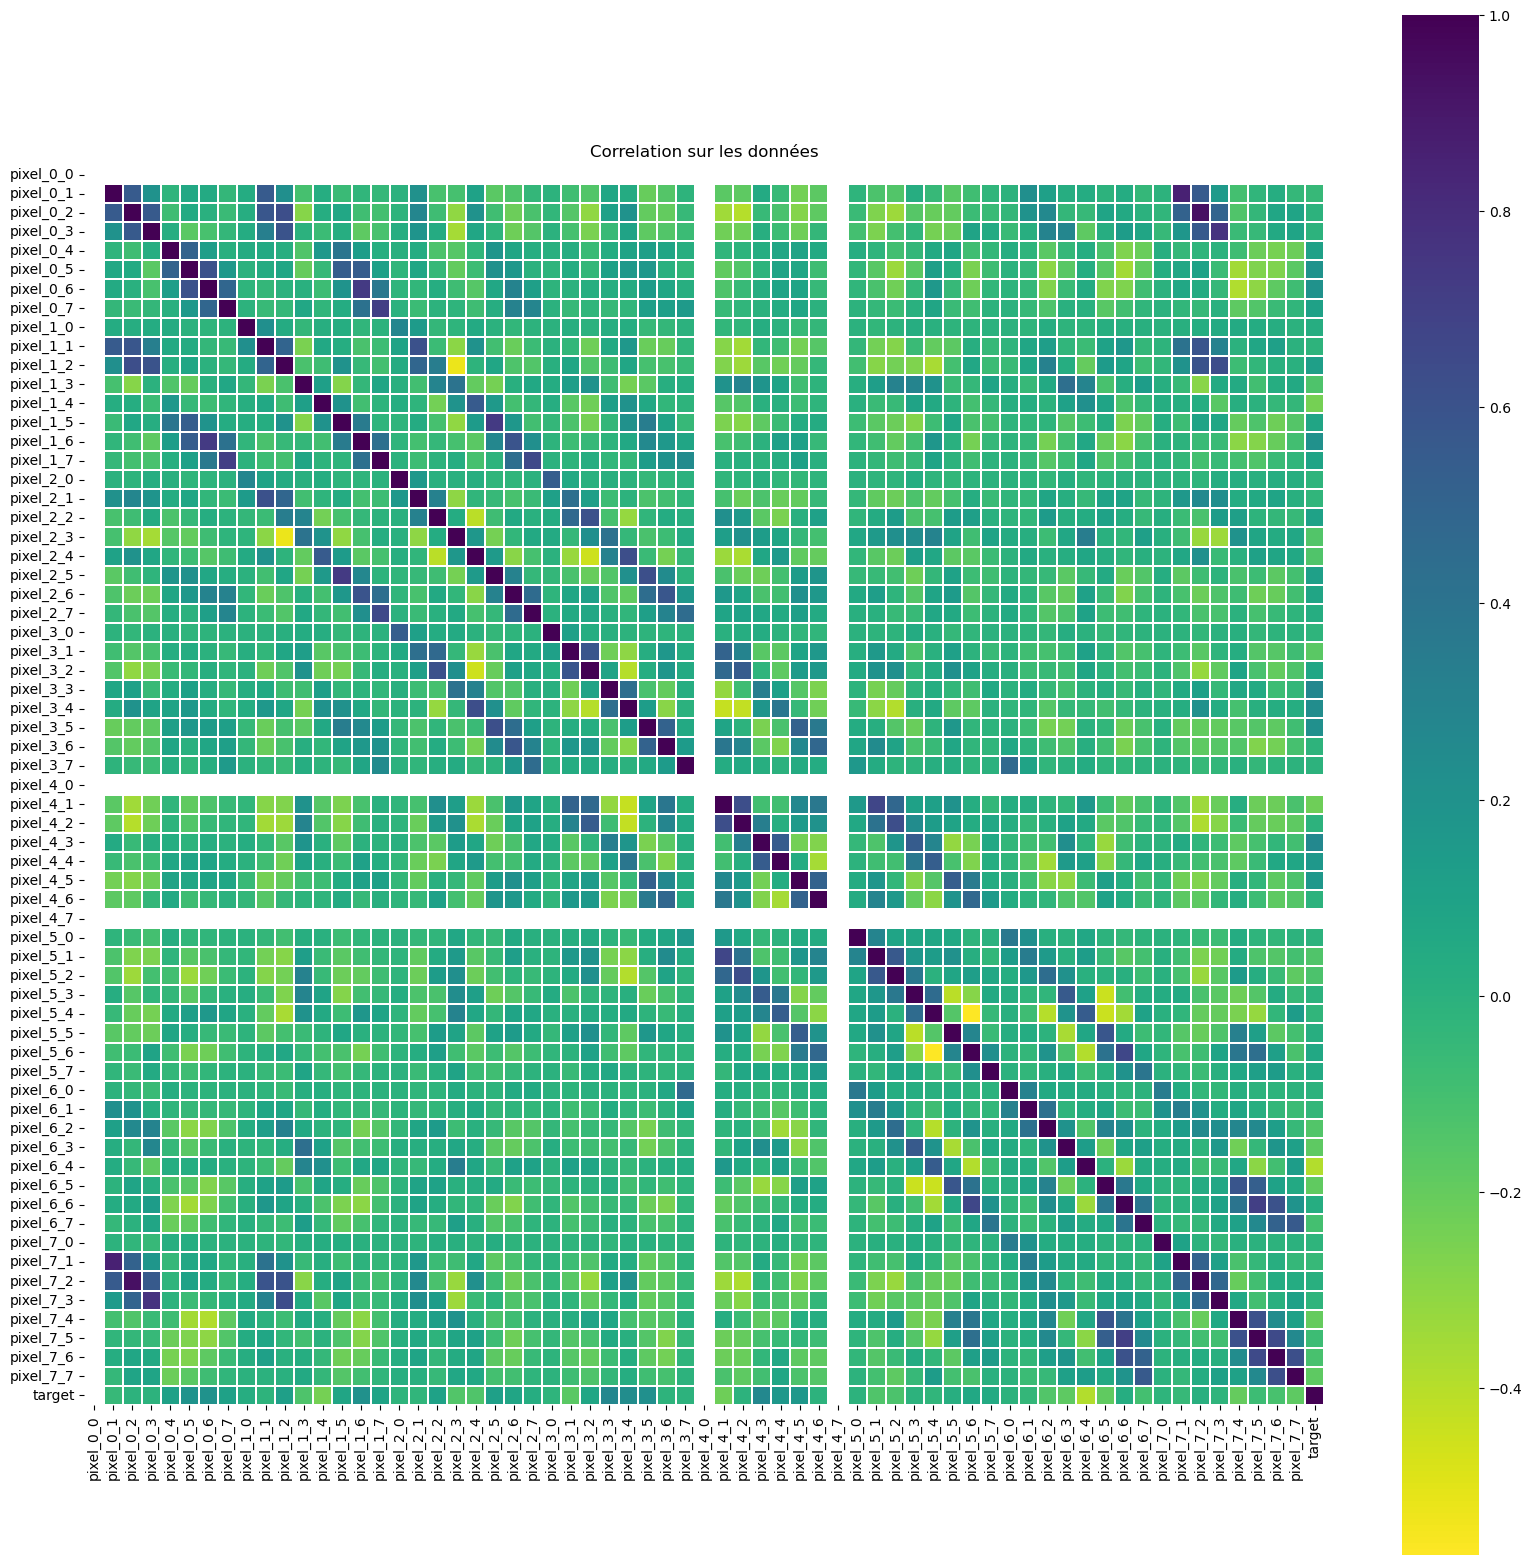

In [6]:
# visualisation de la corrélation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),vmax=1.0, cmap = plt.cm.viridis_r,linecolor='white',square=True,linewidths=0.1)
plt.title('Correlation sur les données')

In [7]:
# vérification des valeurs manquantes
df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

In [8]:
# info sur les types de données
df.dtypes

pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
              ...   
pixel_7_4    float64
pixel_7_5    float64
pixel_7_6    float64
pixel_7_7    float64
target         int32
Length: 65, dtype: object

In [9]:
# calcul des différents fonctions
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


# 3 Pretraitement ,Algorithme d'apprentissage et visualisation 

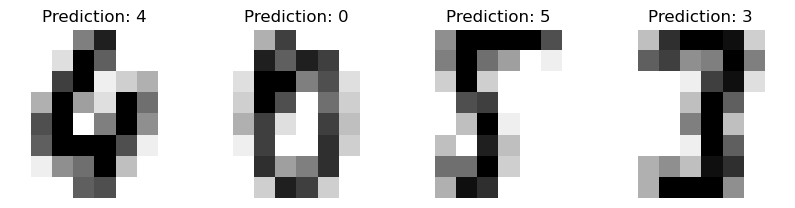

In [60]:
# Aplatir les images
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

# Creation d'un classificateur: un classificateur de vecteur support
clf = svm.SVC(gamma=0.001)

# Fractionner les données en 70 % de trains et 30 % de sous-ensembles de tests
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False
)

# # Apprenez les chiffres sur le sous-ensemble de trains
clf.fit(X_train, y_train)

# # Prédire la valeur du chiffre sur le sous-ensemble de test
predicted = clf.predict(X_test)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")


In [47]:
data = digits.images.reshape((n_samples, -1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [37]:
digits.data.shape

(1797, 64)

# 4 Explication des metriques d'évaluation

## Ici nous avons la precision, le recall , le f1_score, le support et la matrice de confusion

In [12]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 52  1  0  0  0  0  0  0]
 [ 0  0  0 47  0  2  0  0  4  0]
 [ 0  0  0  0 54  0  0  0  1  2]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  1  0  0  0  0  0  0 51  0]
 [ 0  0  0  1  0  1  0  0  0 53]]


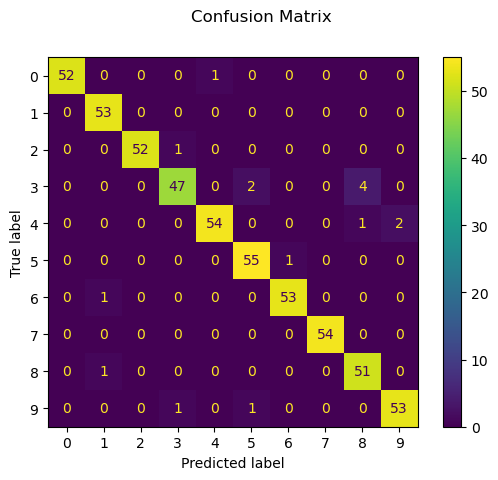

In [13]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


In [58]:
score=clf.score(X_test,y_test)
print(score)

0.9703703703703703
